In [4]:
#Example modified from http://cs231n.github.io/neural-networks-case-study/

#Imports 
import numpy as np #Represent ndarrays a.k.a. tensorsss
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
import pickle #To read data for this experiment

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Data**

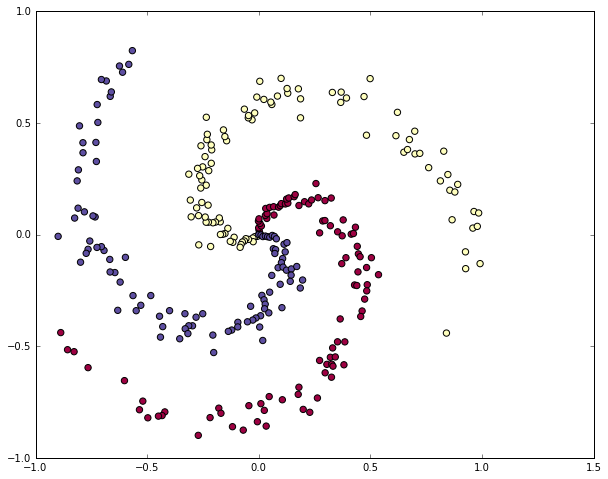

In [5]:

#Read data
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

#Define some local varaibles
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

**Model**

In [6]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.

In [7]:
#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
for i in xrange(200):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.098428
iteration 10: loss 0.908268
iteration 20: loss 0.837509
iteration 30: loss 0.805409
iteration 40: loss 0.788709
iteration 50: loss 0.779190
iteration 60: loss 0.773411
iteration 70: loss 0.769739
iteration 80: loss 0.767326
iteration 90: loss 0.765697
iteration 100: loss 0.764576
iteration 110: loss 0.763791
iteration 120: loss 0.763235
iteration 130: loss 0.762836
iteration 140: loss 0.762547
iteration 150: loss 0.762337
iteration 160: loss 0.762183
iteration 170: loss 0.762070
iteration 180: loss 0.761986
iteration 190: loss 0.761924


**Post Training**

In [9]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.
X_test = X
y_test = y

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))

test accuracy: 0.51


(-1.8994431104458032, 1.8205568895542001)

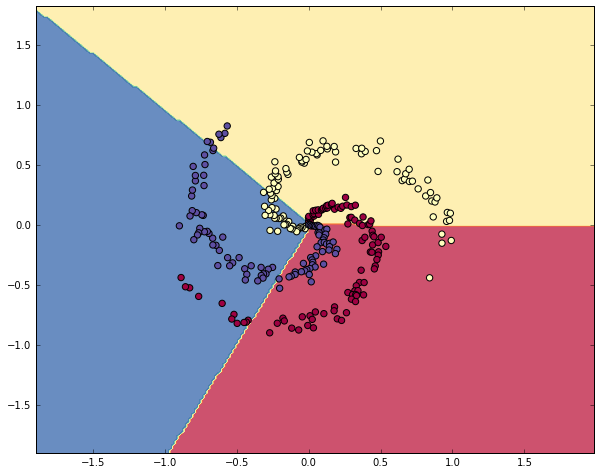

In [10]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')